In [1]:
# load libraries
import os
from glob import glob
import pandas as pd
import fafbseg
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [2]:
# load T4 dataset
path = r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs'
filename = glob(path +"\\"+"*.xlsx")
#dataset = pd.read_excel(filename)
# what is most efficient? Load all excels in a list and then choose? or one by one?
excel_list  = []
for i in filename:
    print(f'Importing:{i}')
    excelPath = os.path.join(path,i)
    df = pd.read_excel(excelPath)
    excel_list.append(df)

Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4a_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4b_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4c_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4d_neurons_input_count_R_19Dec2023.xlsx


In [5]:
db = pd.concat(excel_list)
print(f'\n\nCell types in the database: {db.symbol.unique()}, total = {len(db.symbol.unique())}')



Cell types in the database: ['CT1' 'Mi1' 'Mi9' 'Tm3' nan 'T4a' 'Mi4' 'TmY15' 'C3' 'T4c' 'T4d' 'T4b'
 'Mi10' 'C2' 'Pm1_Tm2' 'Pm3' 'Tm2' 'PS125' 'Me-Lo-2-N.I.' 'Pm1a_Tm1'
 'TmY17' 'Dm10' 'T3' 'Pm1_Tm1' 'Pm1a_Mi1' 'Tm9' 'Tm1' 'Tm20' 'TmY10' 'Tm4'
 'Mi13' 'Pm4' 'Pm2' 'Tm16' 'ML1' 'Tm4a'], total = 36


In [4]:
# Now let's find all Mi1, Mi4, Tm3 neurons and plot their distributions. What about 
db

,Unnamed: 0,guess,author,presynaptic_ID,counts,postsynaptic_ID,symbol,optic_lobe_id,dorso-ventral
0,0,CT1,95,720575940612413026,31,720575940638662708,CT1,T4a-R20,NaN
1,1,Mi1,100,720575940630505297,27,720575940638662708,Mi1,T4a-R20,NaN
2,2,Mi1,100,720575940625448394,14,720575940638662708,Mi1,T4a-R20,NaN
3,3,Mi8; Medullary intrinsic neuron 8; FBbt_00003783,392,720575940614609831,11,720575940638662708,Mi9,T4a-R20,NaN
4,4,"Tm3; Transmedullary neuron 3; Fischbach, K.F.,...",392,720575940608828425,10,720575940638662708,Tm3,T4a-R20,NaN
...,...,...,...,...,...,...,...,...,...
42237,42237,TmY15; Transmedullary Y neuron 15; FBbt_00048246,392,720575940621418573,1,720575940624648124,TmY15,T4d-R752,NaN
42238,42238,Mi8; Medullary intrinsic neuron 8; FBbt_00003783,392,720575940607858889,1,720575940624648124,Mi9,T4d-R752,NaN
42239,42239,Y11,8,720575940645723428,1,720575940624648124,NaN,T4d-R752,NaN
42240,42240,Centrifugal 3; C3; FBbt_00003744,392,720575940639286899,1,720575940624648124,C3,T4d-R752,NaN


In [41]:
# For each subtype:
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4c_neurons_input_count_R_19Dec2023.xlsx')

In [42]:
##How many T4 cells in the right optic lobe
print(f'\n\nCell types in the database: {db.optic_lobe_id.unique()}, total = {len(db.optic_lobe_id.unique())}')



Cell types in the database: ['T4c-R14' 'T4c-R27' 'T4c-R26' 'T4c-R17' 'T4c-R3' 'T4c-R6' 'T4c-R29'
 'T4c-R22' 'T4c-R20' 'T4c-R15' 'T4c-R16' 'T4c-R28' 'T4c-R25' 'T4c-R11'
 'T4c-R10' 'T4c-R21' 'T4c-R30' 'T4c-R13' 'T4c-R19' 'T4c-R7' 'T4c-R23'
 'T4c-R2' 'T4c-R24' 'T4c-R12' 'T4c-R18' 'T4c-R1' 'T4c-R8' 'T4c-R4'
 'T4c-R5' 'T4c-R9' 'T4c-R44' 'T4c-R57' 'T4c-R58' 'T4c-R41' 'T4c-R52'
 'T4c-R56' 'T4c-R36' 'T4c-R49' 'T4c-R59' 'T4c-R47' 'T4c-R39' 'T4c-R37'
 'T4c-R54' 'T4c-R45' 'T4c-R60' 'T4c-R55' 'T4c-R46' 'T4c-R34' 'T4c-R33'
 'T4c-R43' 'T4c-R31' 'T4c-R48' 'T4c-R40' 'T4c-R42' 'T4c-R50' 'T4c-R53'
 'T4c-R51' 'T4c-R32' 'T4c-R35' 'T4c-R38' 'T4c-R61' 'T4c-R89' 'T4c-R77'
 'T4c-R73' 'T4c-R62' 'T4c-R81' 'T4c-R71' 'T4c-R83' 'T4c-R72' 'T4c-R86'
 'T4c-R84' 'T4c-R70' 'T4c-R78' 'T4c-R75' 'T4c-R63' 'T4c-R82' 'T4c-R74'
 'T4c-R79' 'T4c-R66' 'T4c-R68' 'T4c-R69' 'T4c-R80' 'T4c-R67' 'T4c-R88'
 'T4c-R90' 'T4c-R64' 'T4c-R76' 'T4c-R87' 'T4c-R85' 'T4c-R65' 'T4c-R117'
 'T4c-R96' 'T4c-R110' 'T4c-R119' 'T4c-R93' 'T4c-R100' '

In [43]:
print(f'\n\nCell types in the database: {db.postsynaptic_ID.unique()}, total = {len(db.postsynaptic_ID.unique())}')



Cell types in the database: [720575940632332333 720575940623820873 720575940638392390
 720575940646592564 720575940600850441 720575940616556561
 720575940637934254 720575940625276990 720575940627327034
 720575940630315052 720575940614101043 720575940624230473
 720575940615215170 720575940622094377 720575940613623848
 720575940628099130 720575940624201805 720575940626210860
 720575940631961657 720575940627179539 720575940637958207
 720575940624007176 720575940618340416 720575940627453995
 720575940618750006 720575940626534404 720575940605550624
 720575940628369418 720575940627113994 720575940624951335
 720575940604983398 720575940626370691 720575940646191236
 720575940609843298 720575940620953724 720575940630610046
 720575940639963224 720575940604635253 720575940647192708
 720575940621555821 720575940634200160 720575940638675034
 720575940620603519 720575940629766247 720575940647825540
 720575940630304894 720575940631883883 720575940621111381
 720575940621705298 720575940636156005 720

In [61]:
db_t4a = db[db['symbol'] == 'T4c']

In [62]:
732+746+833+777

3088

In [6]:
# exclude the unidentified neurons
def heatmap(data_tm9):
    unique_partners = data_tm9['symbol'].value_counts()
    sorted_data = data_tm9.sort_values(by='symbol', key=lambda x: x.map(unique_partners), ascending=False)
    
    sorted_neurons = sorted_data['symbol'].unique()
    
    data = sorted_data.pivot_table(index="optic_lobe_id", columns="symbol", values="counts", aggfunc='sum')
    sorted_neurons = [name for name in sorted_neurons if name in data.columns]
    data = data[sorted_neurons]
    
    max_count = data_tm9.counts.max()  # Get the maximum value from 'counts' in the pivot table
    
    # Exclude the first column from the heatmap
    #excluded_column = data.columns[0]
    #data_without_first_column = data.drop(columns=excluded_column)
    
    ax = sns.heatmap(data, cmap=sns.cm.rocket_r, xticklabels=True, vmax=max_count) # instead of data have data_without_first_column
    
    plt.xticks(ticks=range(len(sorted_neurons)), labels=sorted_neurons, rotation=90)  # Exclude the first label /  plt.xticks(ticks=range(len(sorted_neurons)-1), labels=sorted_neurons[1:], rotation=90)

    print(sorted_neurons)
    return ax

['Mi1', 'Tm3', 'Mi9', 'TmY15', 'T4a', 'Mi4', 'T4b', 'T4c', 'T4d', 'C3', 'Pm1_Tm2', 'Pm3', 'CT1', 'Mi10', 'PS125', 'Me-Lo-2-N.I.', 'C2', 'Pm1a_Tm1', 'Tm2', 'Pm1a_Mi1', 'TmY17', 'Pm1_Tm1', 'Tm4', 'Pm2', 'Mi13', 'T3', 'Tm1', 'TmY10', 'Pm4', 'Dm10', 'Tm16', 'Tm9', 'Tm20', 'Tm4a', 'ML1']


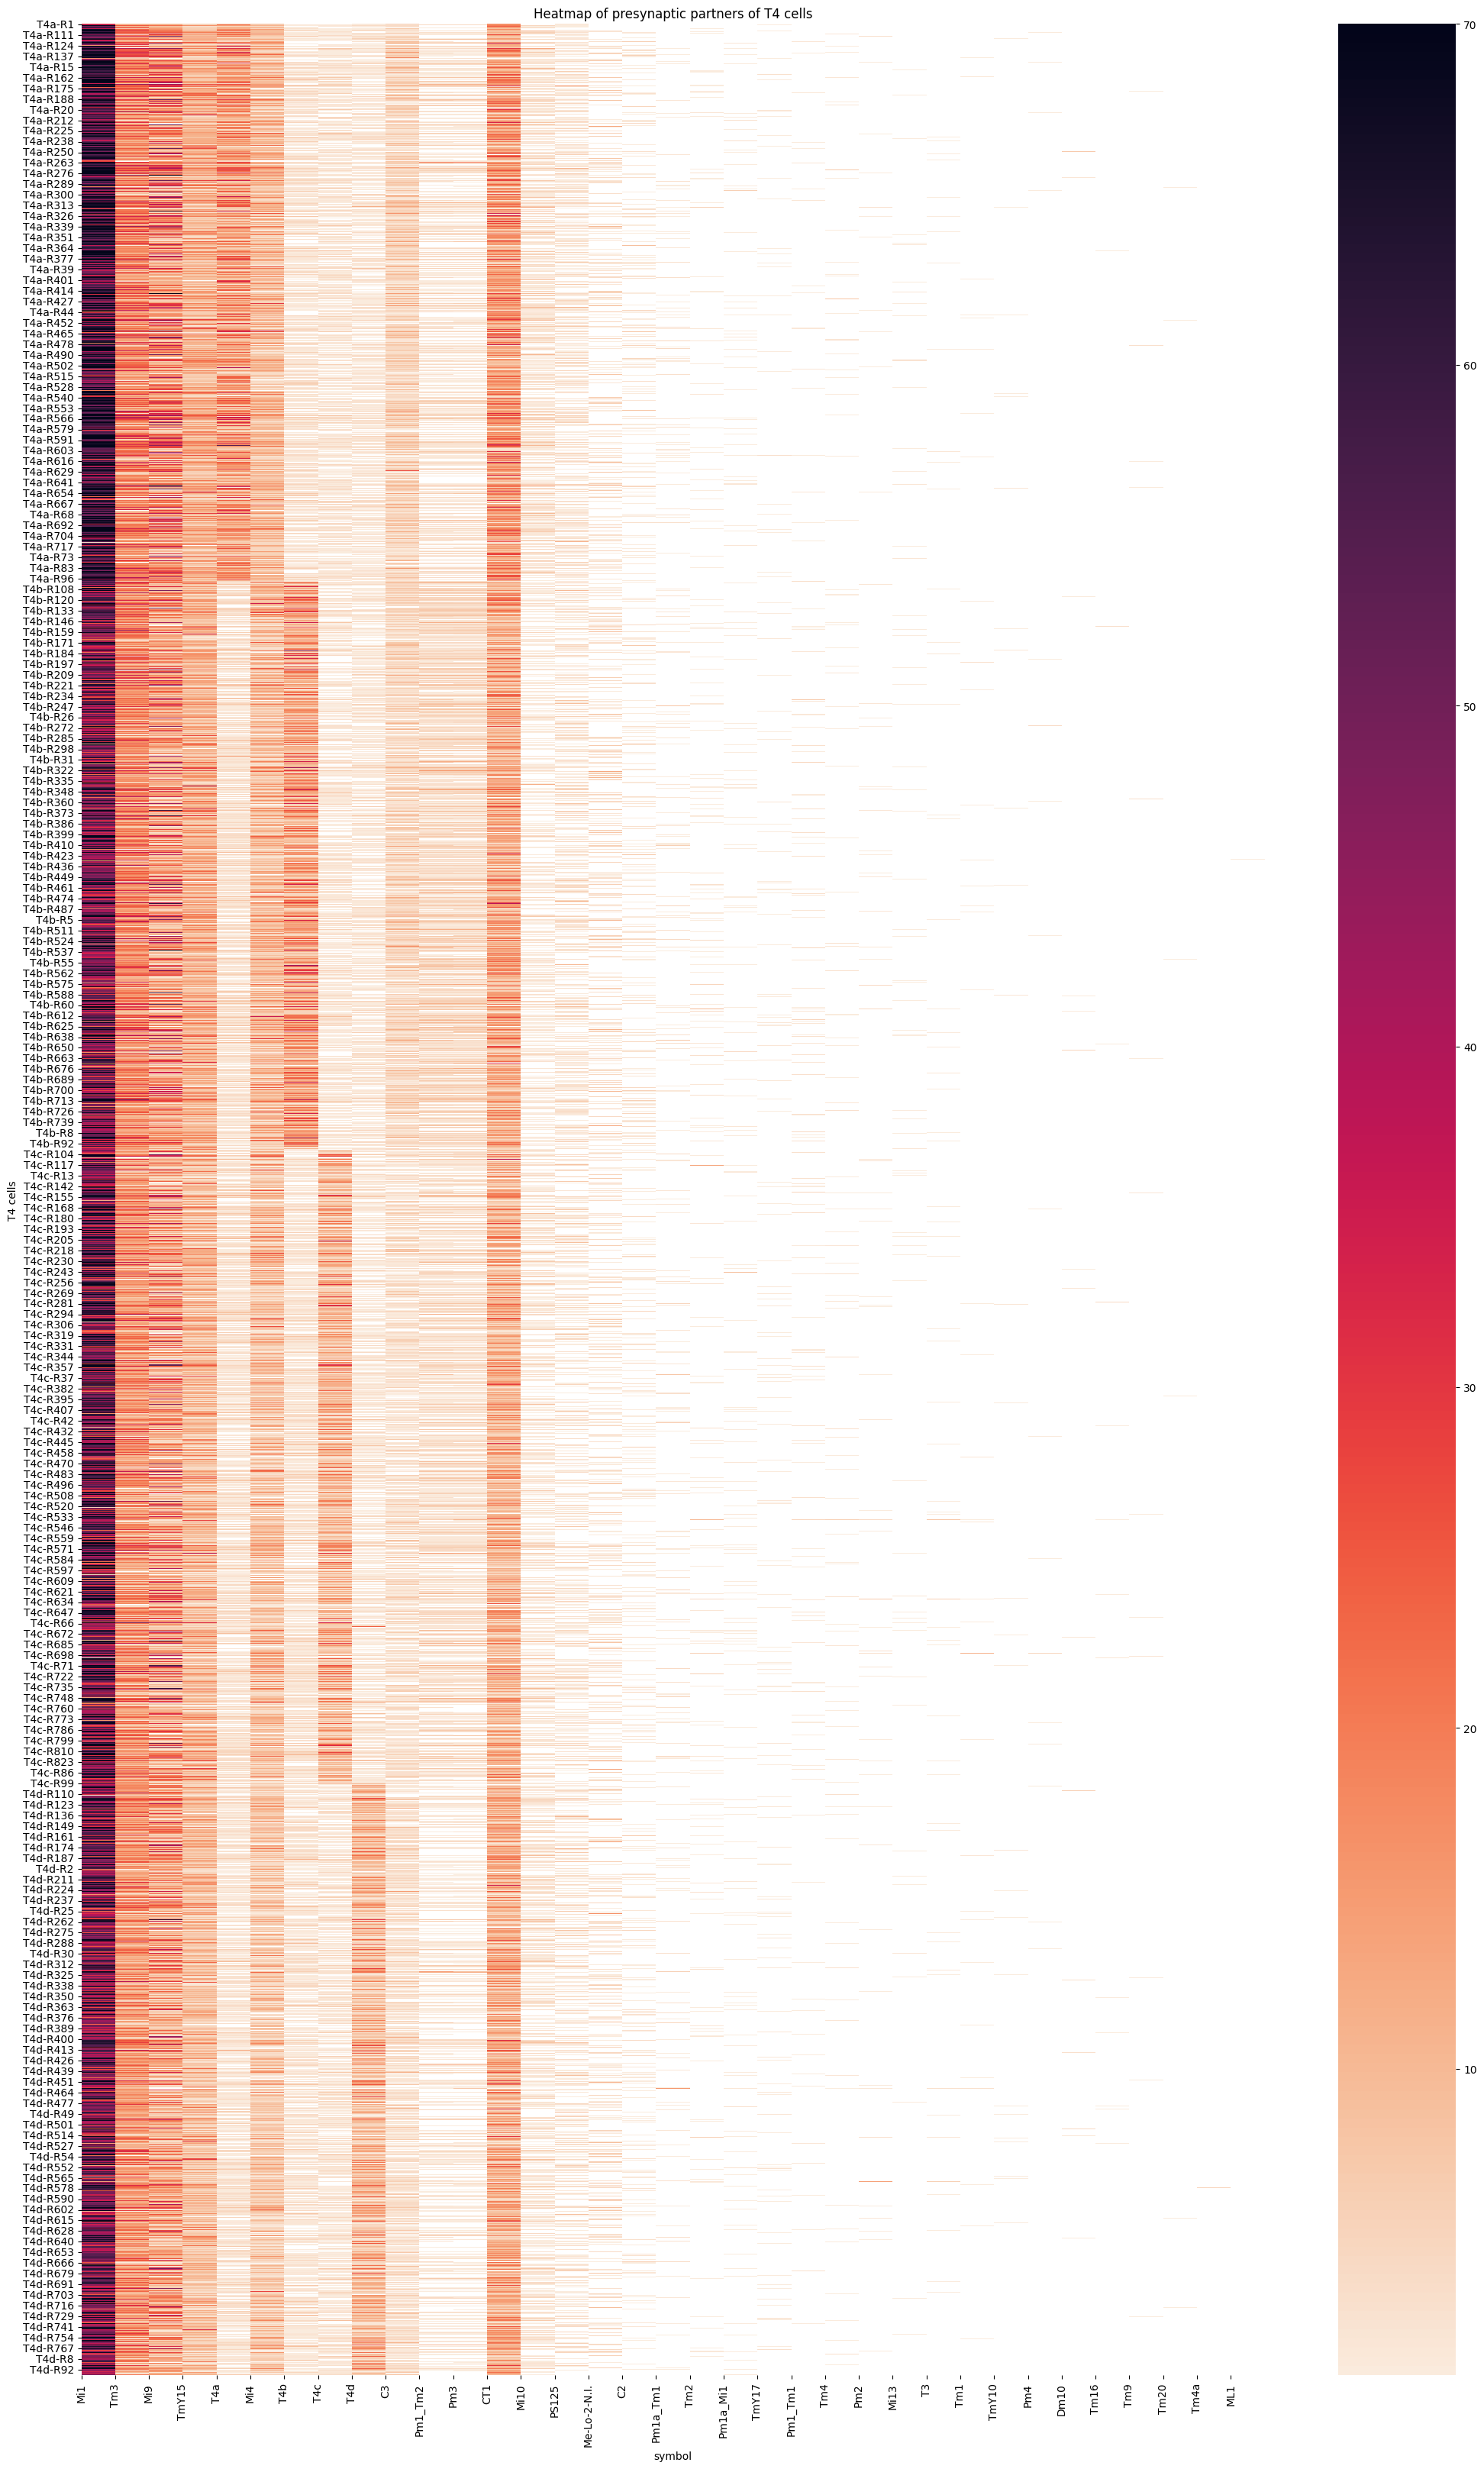

In [7]:
plt.figure(figsize = (25,40))
fig = heatmap(db)
plt.ylabel('T4 cells')
figure = fig.get_figure()    
plt.title('Heatmap of presynaptic partners of T4 cells')
figure.savefig('Heatmap of postsynaptic partners of T4.png')
plt.show()

In [22]:
## Load from Patch 1, Mi1 neurons and their postsynaptic partners.
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\Mi1_outputs\Mi1_patch1_neurons_output_count_R_22Jan2024.xlsx')

### Mi1 neurons as inputs to T4 cells (input_T4)

Mean occurrence of 'Mi1' neurons: 5.700453367875648
The standard deviation is 9.899442380164466


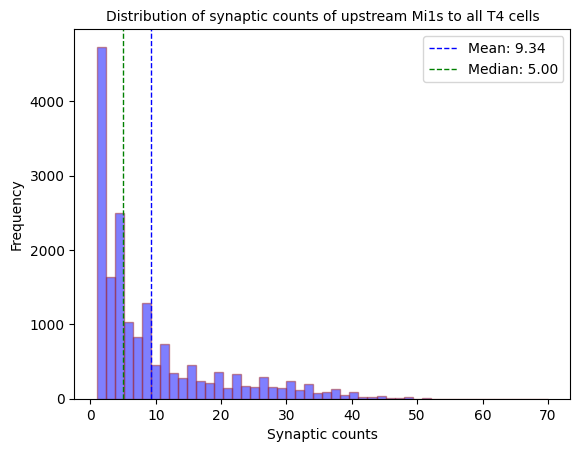

In [5]:
db = pd.concat(excel_list)
mi1_occurrence = db[db['symbol'] == 'Mi1'].groupby('optic_lobe_id').size()
mean_mi1_occurrence = mi1_occurrence.mean()
print(f"Mean occurrence of 'Mi1' neurons: {mean_mi1_occurrence}")
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
mean_value = db['counts'].mean()
median_value = db['counts'].median()
std_dev = db['counts'].std() # the spread of data around the mea
print(f'The standard deviation is {std_dev}')
# Frequency of the Distribution of the synaptic count of Mi1s-T4
# For one T4
db.hist(column = 'counts', grid=False, bins=50, edgecolor = 'brown', color='blue', alpha=0.5)
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.legend()
plt.title('Distribution of synaptic counts of upstream Mi1s to all T4 cells', size=10)
plt.xlabel('Synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
plt.savefig('Distribution of synaptic counts of upstream Mi1s to all T4 cells.png')

Mean occurrence of 'Mi1' neurons: 5.700453367875648
The standard deviation is 0.3461056167954644


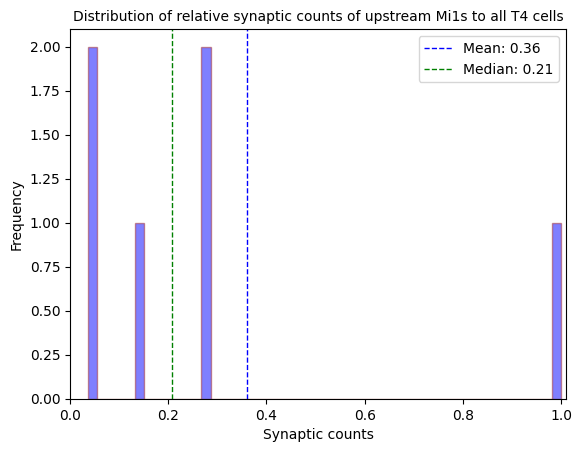

In [101]:
#NONSENSE ###################################################### RELATIVE COUNTS DISTRIBUTION (DIVIDE COUNTS/ MAX MI1-T4) ################################################################## 
db = pd.concat(excel_list)
mi1_occurrence = db[db['symbol'] == 'Mi1'].groupby('optic_lobe_id').size()
mean_mi1_occurrence = mi1_occurrence.mean()
print(f"Mean occurrence of 'Mi1' neurons: {mean_mi1_occurrence}")
symbols_to_select = ['Mi1']


#### Frequency of the Distribution of the relative synaptic count of Mi1s-T4 to the maximum connection

# Normalize the absolute 'counts' column to the maximum Mi1-T4 connection 
db['normalized_counts'] = db['counts'] / db.groupby('optic_lobe_id')['counts'].transform('max')
db = db.loc[db['symbol'].isin(symbols_to_select)]
mean_value = db['normalized_counts'].mean()
median_value = db['normalized_counts'].median()
std_dev = db['normalized_counts'].std() # the spread of data around the mea
print(f'The standard deviation is {std_dev}')
db = db[db['optic_lobe_id'] == 'T4d-R752']
db.hist(column = 'normalized_counts', grid=False, bins=50, edgecolor = 'brown', color='blue', alpha=0.5)
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.legend()
plt.xlim(0,1.01)
plt.title('Distribution of relative synaptic counts of upstream Mi1s to all T4 cells', size=10)
plt.xlabel('Synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
plt.savefig('Distribution of relative synaptic counts of upstream Mi1s to all T4 cells.png')

,Unnamed: 0,guess,author,presynaptic_ID,counts,postsynaptic_ID,symbol,optic_lobe_id,dorso-ventral,normalized_counts
1,1,Mi1,100,720575940630505297,27,720575940638662708,Mi1,T4a-R20,NaN,1.000000
2,2,Mi1,100,720575940625448394,14,720575940638662708,Mi1,T4a-R20,NaN,0.518519
9,9,Mi1,100,720575940631816332,7,720575940638662708,Mi1,T4a-R20,NaN,0.259259
14,14,Mi1,100,720575940632034724,5,720575940638662708,Mi1,T4a-R20,NaN,0.185185
30,30,Mi1,100,720575940627344783,3,720575940638662708,Mi1,T4a-R20,NaN,0.111111
...,...,...,...,...,...,...,...,...,...,...
42195,42195,Mi1,100,720575940621491226,8,720575940624648124,Mi1,T4d-R752,NaN,0.285714
42196,42196,Mi1,100,720575940619213771,8,720575940624648124,Mi1,T4d-R752,NaN,0.285714
42199,42199,Mi1,100,720575940612393000,4,720575940624648124,Mi1,T4d-R752,NaN,0.142857
42222,42222,Mi1,100,720575940618013745,1,720575940624648124,Mi1,T4d-R752,NaN,0.035714


In [100]:
db[db['optic_lobe_id'] == 'T4d-R752']

,Unnamed: 0,guess,author,presynaptic_ID,counts,postsynaptic_ID,symbol,optic_lobe_id,dorso-ventral,normalized_counts
42193,42193,Mi1,100,720575940621852042,28,720575940624648124,Mi1,T4d-R752,NaN,1.000000
42195,42195,Mi1,100,720575940621491226,8,720575940624648124,Mi1,T4d-R752,NaN,0.285714
42196,42196,Mi1,100,720575940619213771,8,720575940624648124,Mi1,T4d-R752,NaN,0.285714
42199,42199,Mi1,100,720575940612393000,4,720575940624648124,Mi1,T4d-R752,NaN,0.142857
42222,42222,Mi1,100,720575940618013745,1,720575940624648124,Mi1,T4d-R752,NaN,0.035714
42232,42232,Mi1,100,720575940615590034,1,720575940624648124,Mi1,T4d-R752,NaN,0.035714


In [90]:
db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
db = db.loc[db.groupby('optic_lobe_id')['counts'].idxmax()]
print(db)

      Unnamed: 0 guess author      presynaptic_ID  counts     postsynaptic_ID  \
1496        1496   Mi1    100  720575940624769771      13  720575940628926467   
1496        1496   Mi1    100  720575940623946851       8  720575940629010432   
1496        1496   Mi1    100  720575940632194221       6  720575940610863150   
523          523   Mi1    100  720575940629180422      16  720575940616695835   
6853        6853   Mi1    100  720575940644950216      34  720575940646150435   
...          ...   ...    ...                 ...     ...                 ...   
5084        5084   Mi1    100  720575940621505718      17  720575940622149887   
5497        5497   Mi1    100  720575940615266866      16  720575940622504191   
5973        5973   Mi1    100  720575940621263014      10  720575940617488641   
5256        5256   Mi1    100  720575940607385283      30  720575940623374591   
6135        6135   Mi1    100  720575940606944898      26  720575940620992773   

     symbol optic_lobe_id  

The standard deviation is 4.422939689875652


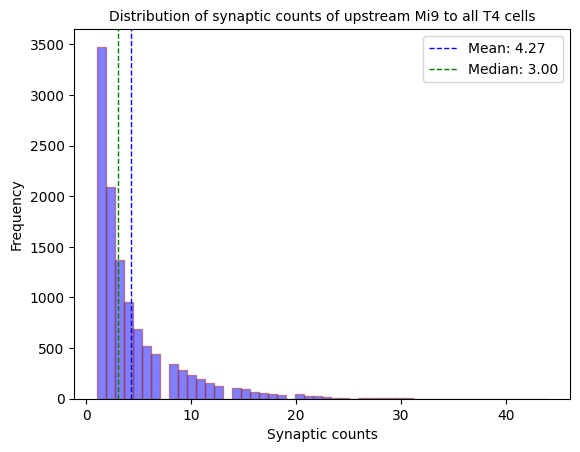

In [75]:
#### Distribution of Synaptic Count of Different Presynaptic Neurons of T4 cells.
db = pd.concat(excel_list)
### Choose your presynaptic neuron : Mi1, CT1, Mi4, Mi9, Tm3
symbols_to_select = 'Mi9'
db = db.loc[db['symbol'].isin([symbols_to_select])]

#mi1_occurrence = db[db['symbol'] == 'Mi1'].groupby('optic_lobe_id').size()
#mean_mi1_occurrence = mi1_occurrence.mean()
#print(f"Mean occurrence of 'Mi1' neurons: {mean_mi1_occurrence}")

mean_value = db['counts'].mean()
median_value = db['counts'].median()
std_dev = db['counts'].std() # the spread of data around the mea
print(f'The standard deviation is {std_dev}')
# Frequency of the Distribution of the synaptic count 
# For one T4
db.hist(column = 'counts', grid=False, bins=50, edgecolor = 'brown', color='blue', alpha=0.5)
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.legend()
plt.title(f'Distribution of synaptic counts of upstream {symbols_to_select} to all T4 cells', size=10)
plt.xlabel('Synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
plt.savefig(f'Distribution of synaptic counts of upstream {symbols_to_select} to all T4 cells.png')

optic_lobe_id
T4a-R1      6
T4a-R10     5
T4a-R100    9
T4a-R101    5
T4a-R102    6
           ..
T4d-R95     4
T4d-R96     6
T4d-R97     7
T4d-R98     5
T4d-R99     5
Length: 3088, dtype: int64


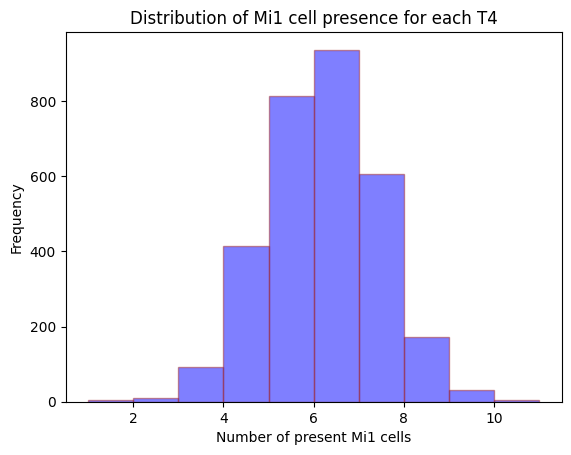

In [85]:
##### Plot how many Mi1/Tm3/Mi4/Mi9/CT1 cells are per T4 in a histogram
db = pd.concat(excel_list)
### Choose your presynaptic neuron : Mi1, CT1, Mi4, Mi9
symbols_to_select = 'Mi1'
db = db.loc[db['symbol'].isin([symbols_to_select])]
### Calculate the mean, median and STD  of the synaptic strength of Mi1-T4 cells
Mi1_occurrence = db[db['symbol'] == symbols_to_select].groupby('optic_lobe_id').size()
print(Mi1_occurrence)
Mi1_occurrence.hist(grid=False, bins=10, edgecolor = 'brown', color='blue', alpha=0.5)

plt.xlabel(f'Number of present {symbols_to_select} cells')
plt.ylabel('Frequency')
plt.title(f'Distribution of {symbols_to_select} cell presence for each T4')
plt.savefig(f'Distribution of {symbols_to_select} cell presence for each T4.png')

In [62]:
db

,Unnamed: 0,guess,author,presynaptic_ID,counts,postsynaptic_ID,symbol,optic_lobe_id,dorso-ventral
0,0,CT1,95,720575940612413026,31,720575940638662708,CT1,T4a-R20,NaN
71,71,CT1,95,720575940612413026,21,720575940623458348,CT1,T4a-R15,NaN
128,128,CT1,95,720575940612413026,26,720575940624535590,CT1,T4a-R13,NaN
196,196,CT1,95,720575940612413026,14,720575940626462768,CT1,T4a-R17,NaN
257,257,CT1,95,720575940612413026,2,720575940629305347,CT1,T4a-R2,NaN
...,...,...,...,...,...,...,...,...,...
42017,42017,CT1,95,720575940612413026,9,720575940624109547,CT1,T4d-R770,NaN
42072,42072,CT1,95,720575940612413026,11,720575940616402873,CT1,T4d-R751,NaN
42120,42120,CT1,95,720575940612413026,5,720575940623382506,CT1,T4d-R769,NaN
42156,42156,CT1,95,720575940612413026,10,720575940606642121,CT1,T4d-R759,NaN


In [37]:
print(f'\n\nCell types in the database: {db.optic_lobe_id.unique()}, total = {len(db.optic_lobe_id.unique())}')



Cell types in the database: ['T4a-R20' 'T4a-R15' 'T4a-R13' ... 'T4d-R769' 'T4d-R759' 'T4d-R752'], total = 3088


optic_lobe_id
T4a-R1      3.000000
T4a-R10     3.181818
T4a-R100    3.785714
T4a-R101    3.127273
T4a-R102    2.964286
              ...   
T4d-R95     2.755556
T4d-R96     3.500000
T4d-R97     2.543860
T4d-R98     3.380000
T4d-R99     3.111111
Name: counts, Length: 3088, dtype: float64
maximum mean 5.240963855421687
minimum mean 1.76


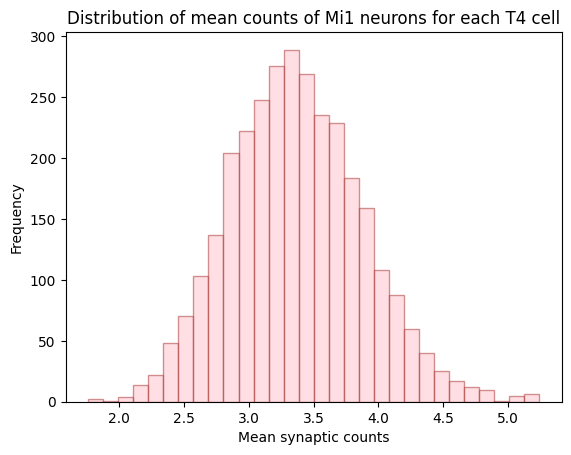

In [86]:
db = pd.concat(excel_list)
mean_counts_by_optic_lobe = db.groupby('optic_lobe_id')['counts'].mean()
print(mean_counts_by_optic_lobe)
plt.hist(mean_counts_by_optic_lobe,bins=30, edgecolor = 'brown', color='pink', alpha=0.5)
plt.title('Distribution of mean counts of Mi1 neurons for each T4 cell')
plt.xlabel('Mean synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
print(f'maximum mean {mean_counts_by_optic_lobe.max()}')
print(f'minimum mean {mean_counts_by_optic_lobe.min()}')
#plt.savefig('Distribution of mean counts of Mi1 neurons for each T4 cell.png')

optic_lobe_id
T4a-R1      2.0
T4a-R10     2.0
T4a-R100    2.0
T4a-R101    1.0
T4a-R102    2.0
           ... 
T4d-R95     1.0
T4d-R96     2.0
T4d-R97     1.0
T4d-R98     2.0
T4d-R99     2.0
Name: counts, Length: 3088, dtype: float64
maximum mean 3.0
minimum mean 1.0


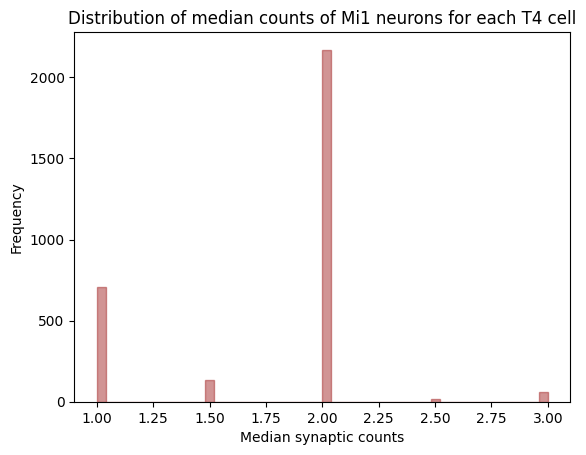

In [75]:
db = pd.concat(excel_list)
mean_counts_by_optic_lobe = db.groupby('optic_lobe_id')['counts'].median()
print(mean_counts_by_optic_lobe)
plt.hist(mean_counts_by_optic_lobe,bins=50, edgecolor = 'brown', color='brown', alpha=0.5)
plt.title('Distribution of median counts of Mi1 neurons for each T4 cell')
plt.xlabel('Median synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
print(f'maximum mean {mean_counts_by_optic_lobe.max()}')
print(f'minimum mean {mean_counts_by_optic_lobe.min()}')
plt.savefig('Distribution of median counts of Mi1 neurons for each T4 cell.png')

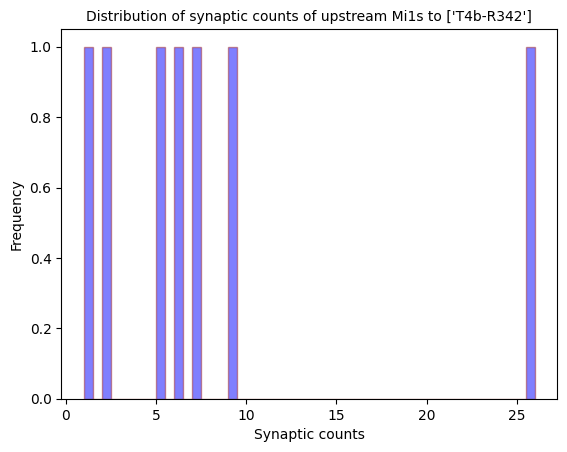

In [60]:
### Same plot as above but for all individual T4 cells.
db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
### Here select specific T4 cells
T4 = ['T4b-R342']
db = db.loc[db['optic_lobe_id'].isin(T4)]
# Frequency of the Distribution of the synaptic count of Mi1s-T4
# For one T4
db.hist(column = 'counts', grid=False, bins=50, edgecolor = 'brown', color='blue', alpha=0.5)
#plt.yscale('log')
plt.title(f'Distribution of synaptic counts of upstream Mi1s to {T4}', size=10)
plt.xlabel('Synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
plt.savefig(f'Distribution of synaptic counts of upstream Mi1s to {T4}.png')

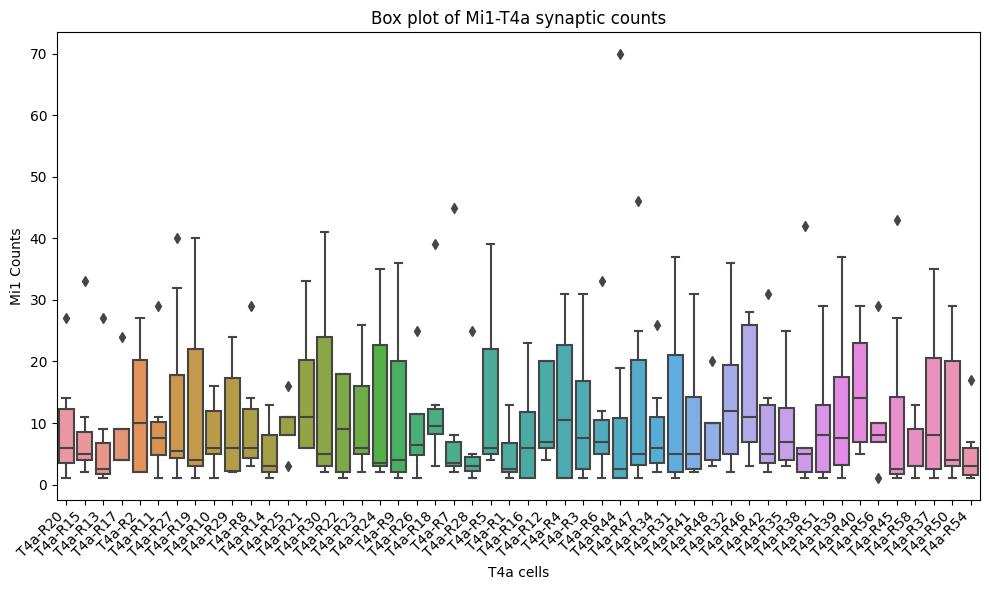

In [30]:
# For T4a:
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4a_neurons_input_count_R_19Dec2023.xlsx')
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('T4a cells')
plt.ylabel('Mi1 Counts')
plt.title('Box plot of Mi1-T4a synaptic counts')
plt.tight_layout()
plt.savefig('Box plot of Mi1-T4a synaptic counts.png')

In [25]:
db['optic_lobe_id'].unique()[:50]

array(['T4a-R20', 'T4a-R15', 'T4a-R13', 'T4a-R17', 'T4a-R2', 'T4a-R11',
       'T4a-R27', 'T4a-R19', 'T4a-R10', 'T4a-R29', 'T4a-R8', 'T4a-R14',
       'T4a-R25', 'T4a-R21', 'T4a-R30', 'T4a-R22', 'T4a-R23', 'T4a-R24',
       'T4a-R9', 'T4a-R26', 'T4a-R18', 'T4a-R7', 'T4a-R28', 'T4a-R5',
       'T4a-R1', 'T4a-R16', 'T4a-R12', 'T4a-R4', 'T4a-R3', 'T4a-R6',
       'T4a-R44', 'T4a-R47', 'T4a-R34', 'T4a-R31', 'T4a-R41', 'T4a-R48',
       'T4a-R32', 'T4a-R46', 'T4a-R42', 'T4a-R35', 'T4a-R38', 'T4a-R51',
       'T4a-R39', 'T4a-R40', 'T4a-R56', 'T4a-R45', 'T4a-R58', 'T4a-R37',
       'T4a-R50', 'T4a-R54'], dtype=object)

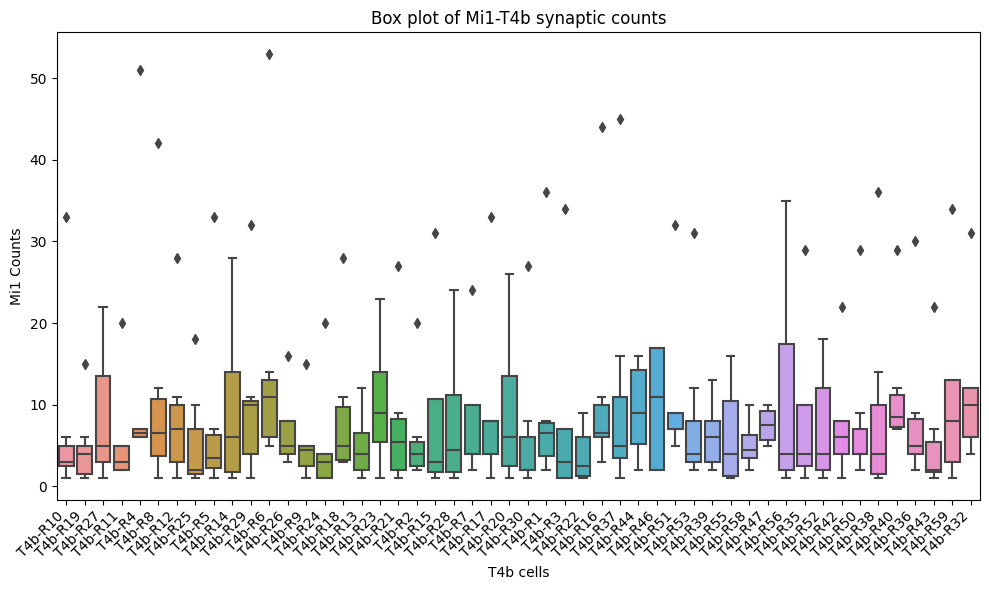

In [34]:
# For T4b:
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4b_neurons_input_count_R_19Dec2023.xlsx')
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('T4b cells')
plt.ylabel('Mi1 Counts')
plt.title('Box plot of Mi1-T4b synaptic counts')
plt.tight_layout()
plt.savefig(f'Box plot of Mi1-T4b synaptic counts.png')

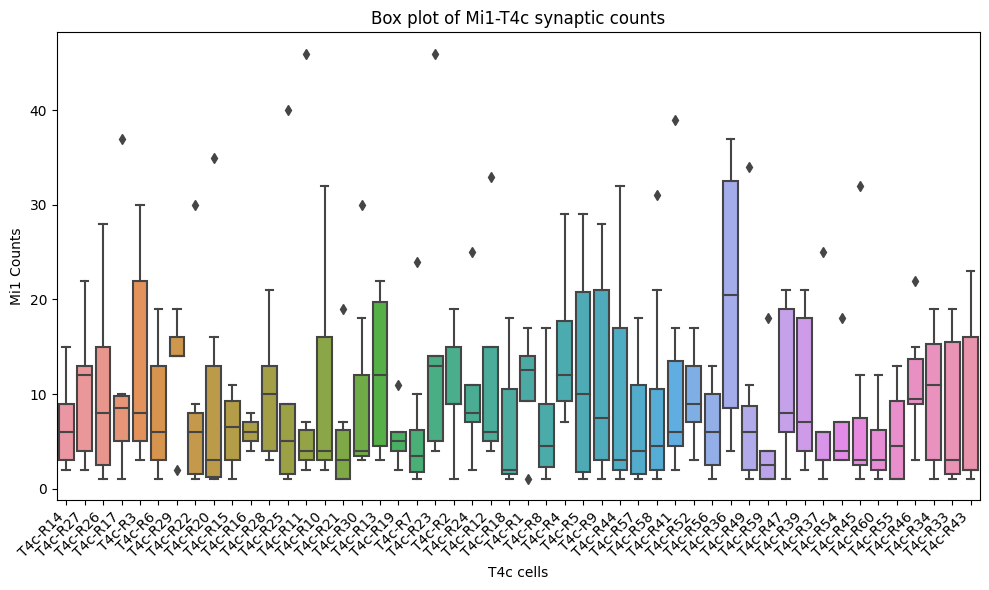

In [35]:
# For T4c:
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4c_neurons_input_count_R_19Dec2023.xlsx')
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('T4c cells')
plt.ylabel('Mi1 Counts')
plt.title('Box plot of Mi1-T4c synaptic counts')
plt.tight_layout()
plt.savefig(f'Box plot of Mi1-T4c synaptic counts.png')

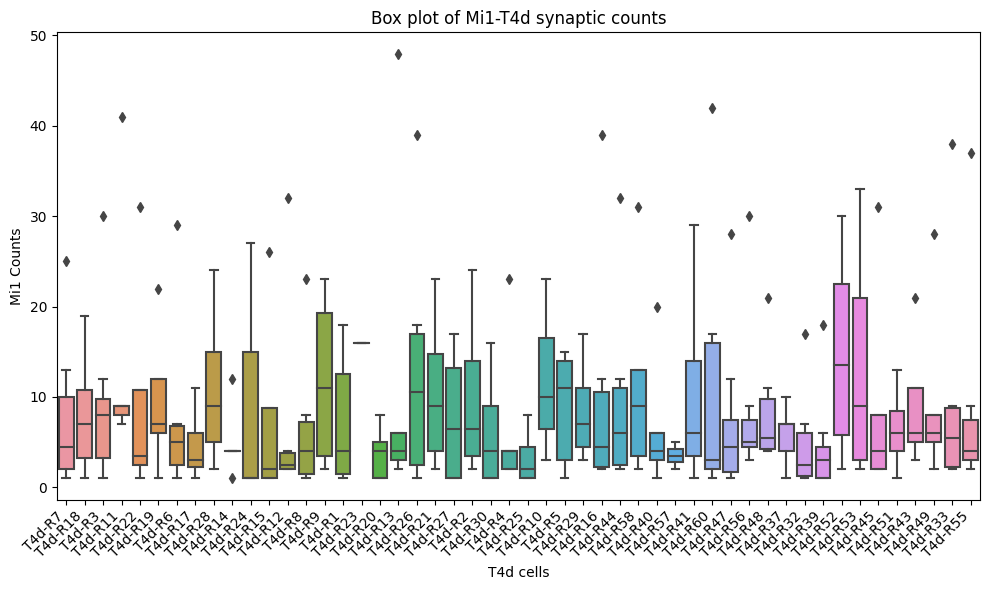

In [36]:
# For T4d:
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4d_neurons_input_count_R_19Dec2023.xlsx')
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('T4d cells')
plt.ylabel('Mi1 Counts')
plt.title('Box plot of Mi1-T4d synaptic counts')
plt.tight_layout()
plt.savefig(f'Box plot of Mi1-T4d synaptic counts.png')

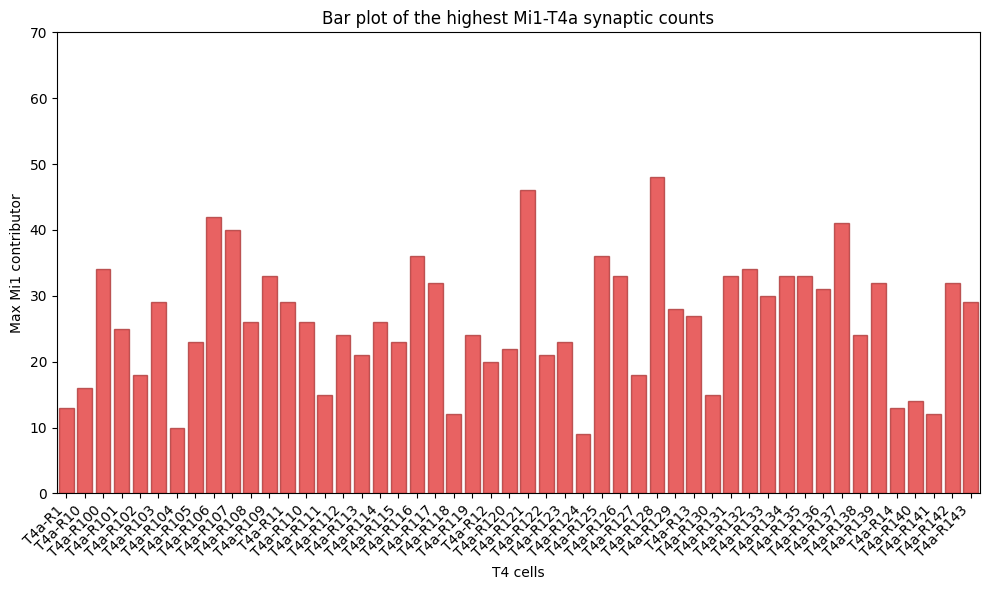

In [39]:
### Bar plots of top count Mi1 neurons for each T4 cell.
### Same plot as above but for all individual T4 cells.
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4a_neurons_input_count_R_19Dec2023.xlsx')
#db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)] # filter through Mi1 neurons
### filter through the highest Mi1 contibutor for each T4 cell
db = db.loc[db.groupby('optic_lobe_id')['counts'].idxmax()]

selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
### Make the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='optic_lobe_id', y='counts', errorbar=None,edgecolor = 'brown', color = 'red',alpha=0.7)
plt.xlabel('T4 cells')
plt.ylabel('Max Mi1 contributor')
plt.ylim(0, db['counts'].max()) # get the maximum value of the entire dataset
plt.title('Bar plot of the highest Mi1-T4a synaptic counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Bar Plot of the highest Mi1-T4a connections.png')

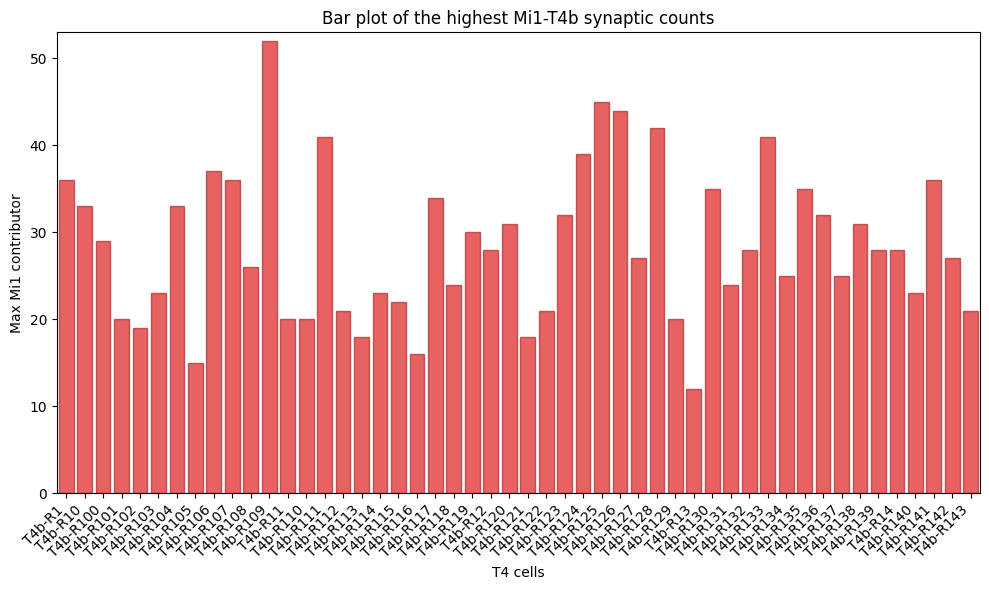

In [52]:
### Bar plots of top count Mi1 neurons for each T4 cell.
### Same plot as above but for all individual T4 cells.
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4b_neurons_input_count_R_19Dec2023.xlsx')
#db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)] # filter through Mi1 neurons
### filter through the highest Mi1 contibutor for each T4 cell
db = db.loc[db.groupby('optic_lobe_id')['counts'].idxmax()]

selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
### Make the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='optic_lobe_id', y='counts', errorbar=None,edgecolor = 'brown', color = 'red',alpha=0.7)
plt.xlabel('T4 cells')
plt.ylabel('Max Mi1 contributor')
plt.ylim(0, db['counts'].max()) # get the maximum value of the entire dataset
plt.title('Bar plot of the highest Mi1-T4b synaptic counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Bar Plot of the highest Mi1-T4b connections.png')

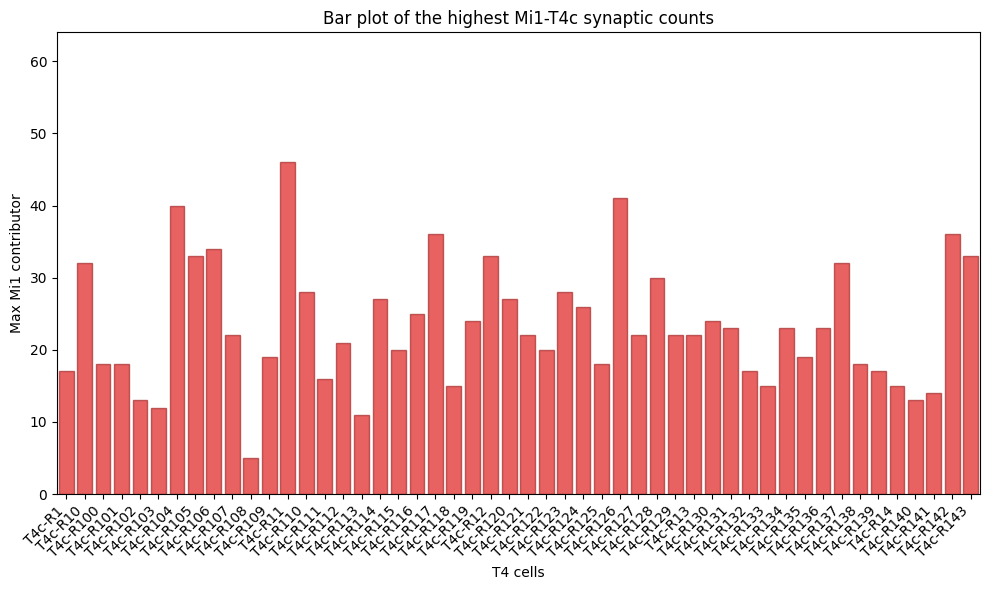

In [53]:
### Bar plots of top count Mi1 neurons for each T4 cell.
### Same plot as above but for all individual T4 cells.
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4c_neurons_input_count_R_19Dec2023.xlsx')
#db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)] # filter through Mi1 neurons
### filter through the highest Mi1 contibutor for each T4 cell
db = db.loc[db.groupby('optic_lobe_id')['counts'].idxmax()]

selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
### Make the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='optic_lobe_id', y='counts', errorbar=None,edgecolor = 'brown', color = 'red',alpha=0.7)
plt.xlabel('T4 cells')
plt.ylabel('Max Mi1 contributor')
plt.ylim(0, db['counts'].max()) # get the maximum value of the entire dataset
plt.title('Bar plot of the highest Mi1-T4c synaptic counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Bar Plot of the highest Mi1-T4c connections.png')

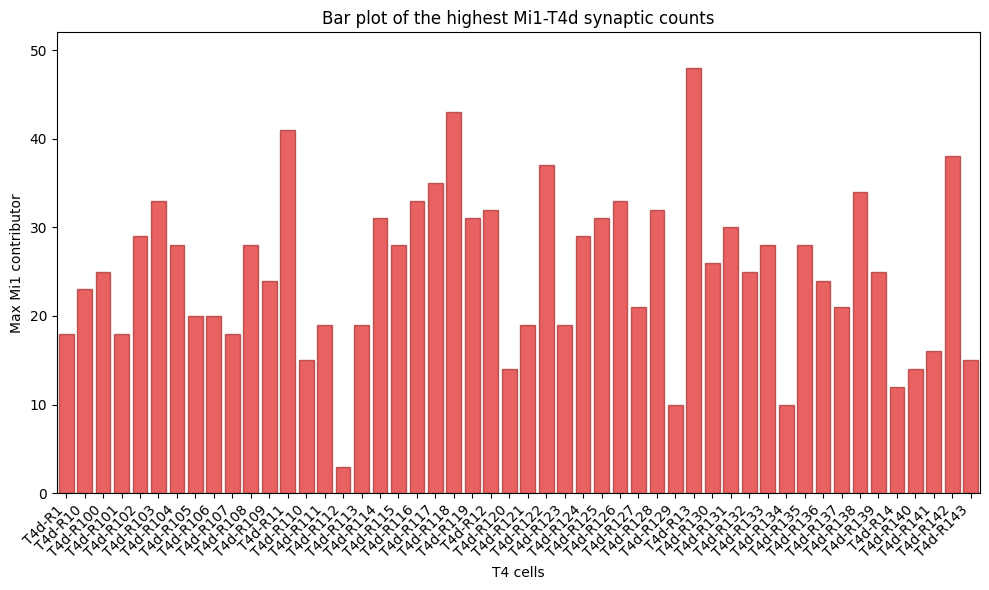

In [54]:
### Bar plots of top count Mi1 neurons for each T4 cell.
### Same plot as above but for all individual T4 cells.
db = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4d_neurons_input_count_R_19Dec2023.xlsx')
#db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)] # filter through Mi1 neurons
### filter through the highest Mi1 contibutor for each T4 cell
db = db.loc[db.groupby('optic_lobe_id')['counts'].idxmax()]

selected_optic_lobe_ids = db['optic_lobe_id'].unique()[:50]
selected_data = db[db['optic_lobe_id'].isin(selected_optic_lobe_ids)]
### Make the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='optic_lobe_id', y='counts', errorbar=None,edgecolor = 'brown', color = 'red',alpha=0.7)
plt.xlabel('T4 cells')
plt.ylabel('Max Mi1 contributor')
plt.ylim(0, db['counts'].max()) # get the maximum value of the entire dataset
plt.title('Bar plot of the highest Mi1-T4d synaptic counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Bar Plot of the highest Mi1-T4d connections.png')

<Figure size 1000x600 with 0 Axes>

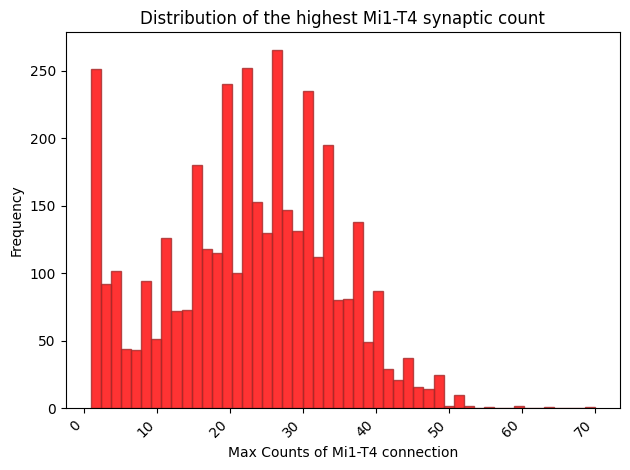

In [72]:
### Same plot as above but for all individual T4 cells.

db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)] # filter through Mi1 neurons
### filter through the highest Mi1 contibutor for each T4 cell
db = db.loc[db.groupby('optic_lobe_id')['counts'].idxmax()]

### Make the histogram
plt.figure(figsize=(10, 6))
db.hist(column = 'counts', grid=False, bins=50, edgecolor = 'brown', color='red', alpha=0.8)
plt.xlabel('Max Counts of Mi1-T4 connection')
plt.ylabel('Frequency')
plt.title('Distribution of the highest Mi1-T4 synaptic count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Distribution of the highest Mi1-T4 connection.png')

In [16]:
db = pd.concat(excel_list)
symbols_to_select = ['Mi1']
db = db.loc[db['symbol'].isin(symbols_to_select)]
db = db.loc[db.groupby('optic_lobe_id')['counts']]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3088, 2) + inhomogeneous part.

In [19]:
db = pd.concat(excel_list)
#print(db)
print(len(db))

179456


In [21]:
lol=db.loc[db['counts']==1]

print(len(lol['presynaptic_ID'].values))
print(len(lol['presynaptic_ID'].unique()))

81492
27374


### Dataset from Jonas

In [25]:
# Compare lists of T4 cells from patch 1 from Flywire , with the generated list from the script.
t4_list_code = [720575940632675117,720575940612049777,720575940635075038,720575940626791468,720575940621791237,720575940625989907,720575940616015803,720575940634914411,720575940634086295,720575940619062693,720575940620178256,720575940606642121,720575940621626094,720575940613711279,720575940629794295,720575940614891462,720575940624756408,720575940660868481,720575940622788195,720575940604521952,720575940633380192,720575940652193014,720575940604812204,720575940624704491,720575940633583187,720575940637084991,720575940642126221,720575940610861717,720575940631110475,720575940625119053,720575940626174210,720575940612415146,720575940640240373,720575940613526422,720575940632674605,720575940622227068,720575940634254748,720575940631072527,720575940614273022,720575940612993650,720575940627094346,720575940634874975,720575940630996754,720575940606319206,720575940620611866,720575940623447530,720575940619043413,720575940627453995,720575940627116042,720575940621893219,720575940612617881,720575940620746849,720575940634893534,720575940633320343,720575940629707628,720575940616402873,720575940620277942,720575940638284622,720575940620623469,720575940615234207,720575940623208376,720575940640595152,720575940641410011,720575940638894406,720575940626534914,720575940615054815,720575940612755314,720575940624513255,720575940631345450,720575940640961269,720575940621238767,720575940614269351,720575940628585987,720575940624694823,720575940635214181,720575940628835015,720575940631307212,720575940634027932,720575940638064061,720575940627247620,720575940631507287,720575940620395759,720575940628459526,720575940630260188,720575940640839741,720575940632067665,720575940622773530,720575940628456091,720575940627266054,720575940635718751,720575940624648679,720575940643758280,720575940621044084,720575940620747553,720575940631138322,720575940631935116,720575940622534614,720575940634862490,720575940623123494,720575940626777496,720575940613462579,720575940622215779,720575940622969853,720575940633071827,720575940636387502,720575940619171604,720575940614431378,720575940631897362,720575940607063730,720575940620606061,720575940613104497,720575940627505277,720575940615630934,720575940638480755,720575940641411547,720575940635186839,720575940604828849,720575940628712448,720575940631012370,720575940624109547,720575940614722198,720575940620908969,720575940603394272,720575940613984943]
t4_list_jonas = [720575940633380192,720575940626791468,720575940627505277,720575940622215779,720575940621044084,720575940613104497,720575940638480755,720575940631012370,720575940613526422,720575940627116042,720575940634862490,720575940603394272,720575940641410011,720575940628456091,720575940632674605,720575940620908969,720575940634027932,720575940631110475,720575940640595152,720575940630996754,720575940604521952,720575940626534914,720575940613984943,720575940631897362,720575940620747553,720575940612755314,720575940624648679,720575940621893219,720575940631307212,720575940614891462,720575940627247620,720575940631507287,720575940627453995,720575940604828849,720575940623123494,720575940652193014,720575940620606061,720575940619062693,720575940620746849,720575940624704491,720575940660868481,720575940638284622,720575940635214181,720575940622534614,720575940631804845,720575940622227068,720575940635075038,720575940631072527,720575940625989907,720575940628712448,720575940637084991,720575940621791237,720575940613711279,720575940643758280,720575940642126221,720575940633071827,720575940635718751,720575940624513255,720575940641411547,720575940622773530,720575940616015803,720575940629794295,720575940607063730,720575940634254748,720575940622969853,720575940634086295,720575940634893534,720575940623447530,720575940614431378,720575940627266054,720575940614269351,720575940627094346,720575940606319206,720575940624694823,720575940613462579,720575940624756408,720575940626777496,720575940625119053,720575940606642121,720575940622788195,720575940628585987,720575940620277942,720575940620395759,720575940615234207,720575940632675117,720575940635186839,720575940612617881,720575940615054815,720575940619171604,720575940612049777,720575940631345450,720575940624109547,720575940620611866,720575940638894406,720575940612993650,720575940628459526,720575940615630934,720575940612415146,720575940604812204,720575940630260188,720575940631935116,720575940633320343,720575940640961269,720575940621626094,720575940620623469,720575940614722198,720575940626174210,720575940621238767,720575940636387502,720575940634874975,720575940614421922,720575940632067665,720575940631138322,720575940620178256]

In [26]:
s = set(t4_list_jonas)
temp3 = [x for x in t4_list_code if x not in s]
print(temp3)
print(len(temp3))

[720575940634914411, 720575940633583187, 720575940610861717, 720575940640240373, 720575940614273022, 720575940619043413, 720575940629707628, 720575940616402873, 720575940623208376, 720575940628835015, 720575940638064061, 720575940640839741]
12


In [21]:
len(t4_list_jonas)

114

In [27]:
len(set(t4_list_code))

124

### Mi1 analysis (T4 as postsynaptic, Mi1_ouput)

In [3]:
# Load Mi1 output dataset (796 neurons)
db_Mi1 = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\Mi1_outputs\Mi1_neurons_output_count_R_25Jan2024.xlsx')

In [73]:
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

In [74]:
unique_symbols = db_Mi1['symbol'].unique()
print(unique_symbols)

['Pm1a_Tm1' 'Pm1a_Mi1' 'Pm4' 'Pm2' 'T4d' 'T4c' 'T4b' 'T4a' 'T3' 'Mi4'
 'Tm3' nan 'L1' 'Dm10' 'Mi9' 'Pm3' 'Dm2a' 'CT1' 'L5' 'C2' 'Pm1_Tm2' 'C3'
 'Mi1' 'Tm20' 'Tm2' 'Pm1_Tm1' 'PS125' 'Mi10' 'TmY15' 'Tm1' 'Tm9' 'Dm1'
 'Dm6' 'Dm2c' 'Dm2b' 'Mi13' 'Dm4' 'Me-Lo-2-N.I.' 'Tm4' 'Dm12' 'Tm16' 'L3'
 'R8' 'TmY17' 'TmY10' 'L2' 'T1' 'Dm15' 'R7' 'OA-AL2b2-R1' 'ML1' 'Tm20?'
 'OA-AL2b2-R2' 'Tm4a' 'OA-AL2b2-L1' 'pMP7' 'OA-AL2b2-L2']


In [75]:
db_Mi1_T4

,Unnamed: 0,guess,author,postsynaptic_ID,counts,presynaptic_ID,postynaptic_ID,symbol,optic_lobe_id,dorso-ventral
5,5,T4d; FBbt_00003735,392,720575940610876258,34,720575940625276958,720575940610876258,T4d,Mi1-R17,NaN
6,6,T4c; FBbt_00003734,392,720575940619979313,32,720575940625276958,720575940619979313,T4c,Mi1-R17,NaN
7,7,T4b; FBbt_00003733,392,720575940618508381,32,720575940625276958,720575940618508381,T4b,Mi1-R17,NaN
8,8,T4a; FBbt_00003732,392,720575940622126847,31,720575940625276958,720575940622126847,T4a,Mi1-R17,NaN
12,12,T4c; FBbt_00003734,392,720575940637627749,28,720575940625276958,720575940637627749,T4c,Mi1-R17,NaN
...,...,...,...,...,...,...,...,...,...,...
427839,427839,T4b; FBbt_00003733,392,720575940613292798,5,720575940625577912,720575940613292798,T4b,Mi1-R782,NaN
427846,427846,T4c; FBbt_00003734,392,720575940621086299,4,720575940625577912,720575940621086299,T4c,Mi1-R782,NaN
427848,427848,T4d; FBbt_00003735,392,720575940634542191,4,720575940625577912,720575940634542191,T4d,Mi1-R782,NaN
427872,427872,T4a; FBbt_00003732,392,720575940621353392,3,720575940625577912,720575940621353392,T4a,Mi1-R782,NaN


In [76]:
print('Total number of T4 cells in the right optic lobe', len(db_Mi1_T4['postsynaptic_ID'].unique()))

Total number of T4 cells in the right optic lobe 3088


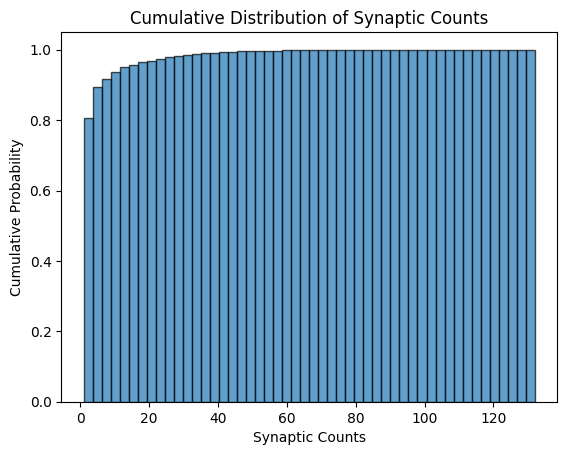

In [52]:
#  Cumulative Distribution Function (CDF)
plt.hist(db_Mi1['counts'], bins=50, cumulative=True, edgecolor='black', density=True, alpha=0.7)
plt.xlabel('Synaptic Counts')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Synaptic Counts')
plt.show()

In [70]:
## Now I can try and plot the sam but for individual Mi1 neurons
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

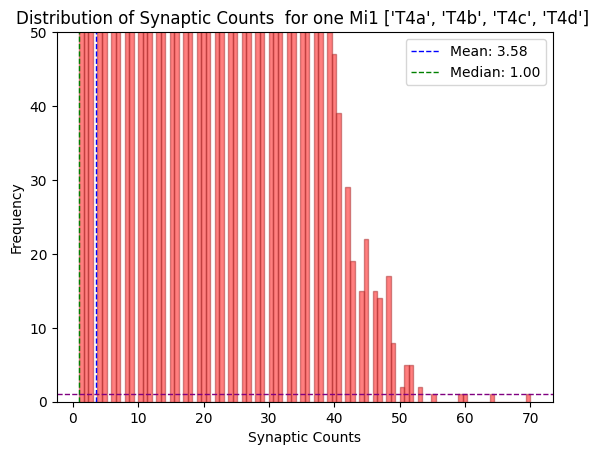

The standard deviation is 7.00


In [77]:
mean_value = db_Mi1['counts'].mean()
median_value = db_Mi1['counts'].median()
std_dev = db_Mi1['counts'].std() # the spread of data around the mea

#plt.hist(db_Mi1['counts'], bins=50, edgecolor='black', alpha=0.7)
db_Mi1_T4.hist(column = 'counts', grid=False, bins=100, edgecolor = 'brown', color='red', alpha=0.5)
#plt.yscale('log')
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axhline(y=1,  color='purple', linestyle='dashed', linewidth=1)
plt.ylim(0,50)
plt.legend()
plt.xlabel('Synaptic Counts')
plt.ylabel('Frequency')
plt.title(f'Distribution of Synaptic Counts  for one Mi1 {symbols_to_select} ')
plt.show()
print(f'The standard deviation is {std_dev:.2f}')

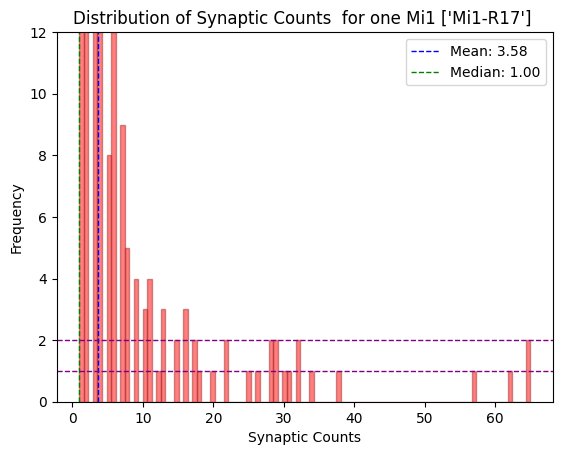

The standard deviation is 7.00


In [68]:
symbols_to_select = ['Mi1-R17']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['optic_lobe_id'].isin(symbols_to_select)]
mean_value = db_Mi1['counts'].mean()
median_value = db_Mi1['counts'].median()
std_dev = db_Mi1['counts'].std() # the spread of data around the mea

#plt.hist(db_Mi1['counts'], bins=50, edgecolor='black', alpha=0.7)
db_Mi1_T4.hist(column = 'counts', grid=False, bins=100, edgecolor = 'brown', color='red', alpha=0.5)
#plt.yscale('log')
plt.ylim(0,12)
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axhline(y=1,  color='purple', linestyle='dashed', linewidth=1)
plt.axhline(y=2,  color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.xlabel('Synaptic Counts')
plt.ylabel('Frequency')
plt.title(f'Distribution of Synaptic Counts  for one Mi1 {symbols_to_select} ')
plt.show()
print(f'The standard deviation is {std_dev:.2f}')

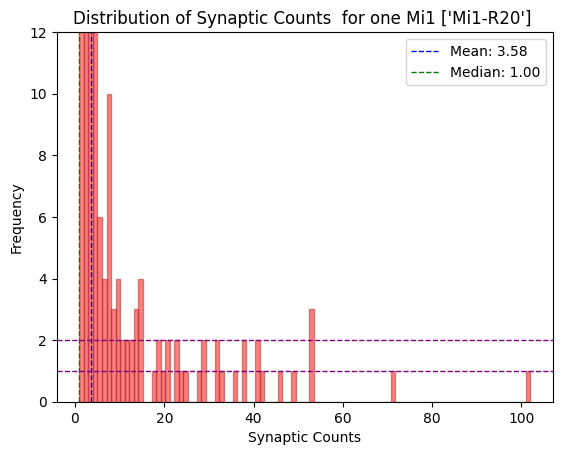

The standard deviation is 7.00


In [69]:
symbols_to_select = ['Mi1-R20']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['optic_lobe_id'].isin(symbols_to_select)]
mean_value = db_Mi1['counts'].mean()
median_value = db_Mi1['counts'].median()
std_dev = db_Mi1['counts'].std() # the spread of data around the mea

#plt.hist(db_Mi1['counts'], bins=50, edgecolor='black', alpha=0.7)
db_Mi1_T4.hist(column = 'counts', grid=False, bins=100, edgecolor = 'brown', color='red', alpha=0.5)
#plt.yscale('log')
plt.ylim(0,12)
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axhline(y=1,  color='purple', linestyle='dashed', linewidth=1)
plt.axhline(y=2,  color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.xlabel('Synaptic Counts')
plt.ylabel('Frequency')
plt.title(f'Distribution of Synaptic Counts  for one Mi1 {symbols_to_select} ')
plt.show()
print(f'The standard deviation is {std_dev:.2f}')

In [ ]:
############# Here I will plot the same as the first section fromt he T4_input dataset

The standard deviation is 9.90


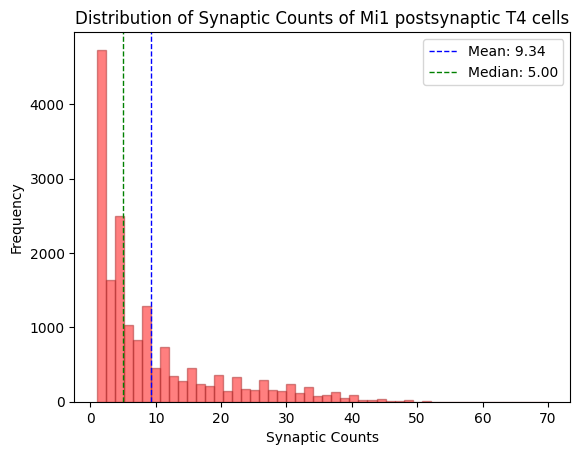

In [6]:
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
### Calculate the mean, median and STD  of the synaptic strength of Mi1-T4 cells
mean_value = db_Mi1_T4['counts'].mean()
median_value = db_Mi1_T4['counts'].median()
std_dev = db_Mi1_T4['counts'].std() # the spread of data around the mea

#plt.hist(db_Mi1['counts'], bins=50, edgecolor='black', alpha=0.7)
db_Mi1_T4.hist(column = 'counts', grid=False, bins=50, edgecolor = 'brown', color='red', alpha=0.5)
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.legend()
plt.xlabel('Synaptic Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Synaptic Counts of Mi1 postsynaptic T4 cells')
plt.savefig('[Mi1_output]Distribution of Synaptic Counts of Mi1 postsynaptic T4 cells.png')
print(f'The standard deviation is {std_dev:.2f}')

optic_lobe_id
Mi1-R1       6.500000
Mi1-R10      8.785714
Mi1-R100     8.294118
Mi1-R101     6.440000
Mi1-R102     7.473684
              ...    
Mi1-R95      5.400000
Mi1-R96      8.678571
Mi1-R97      6.500000
Mi1-R98      9.115385
Mi1-R99     10.400000
Name: counts, Length: 796, dtype: float64
maximum mean 14.555555555555555
minimum mean 1.0


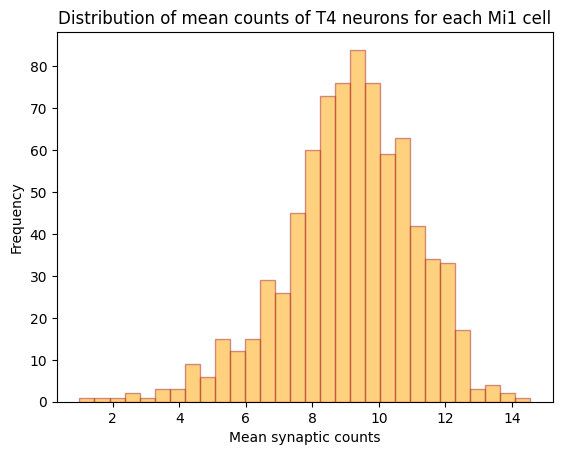

In [7]:
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
mean_counts_by_optic_lobe = db_Mi1_T4.groupby('optic_lobe_id')['counts'].mean()
print(mean_counts_by_optic_lobe)
plt.hist(mean_counts_by_optic_lobe,bins=30, edgecolor = 'brown', color='orange', alpha=0.5)
plt.title('Distribution of mean counts of T4 neurons for each Mi1 cell')
plt.xlabel('Mean synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
print(f'maximum mean {mean_counts_by_optic_lobe.max()}')
print(f'minimum mean {mean_counts_by_optic_lobe.min()}')
plt.savefig('Distribution of mean counts of T4 neurons for each Mi1 cell.png')

optic_lobe_id
Mi1-R1      4.0
Mi1-R10     7.0
Mi1-R100    8.0
Mi1-R101    4.0
Mi1-R102    5.0
           ... 
Mi1-R95     6.0
Mi1-R96     4.0
Mi1-R97     3.0
Mi1-R98     7.0
Mi1-R99     6.0
Name: counts, Length: 796, dtype: float64
maximum mean 11.0
minimum mean 1.0


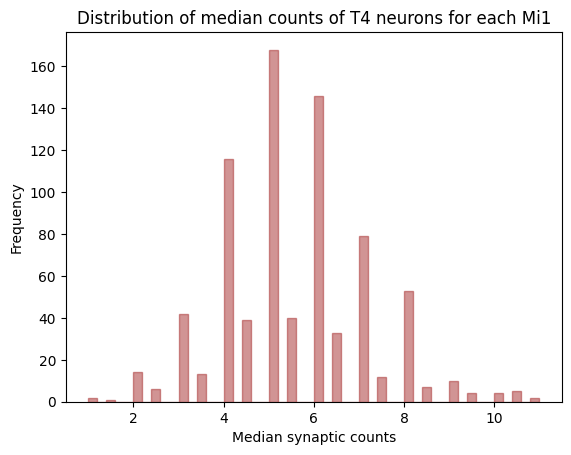

In [13]:
######## Median
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
mean_counts_by_optic_lobe = db_Mi1_T4.groupby('optic_lobe_id')['counts'].median()
print(mean_counts_by_optic_lobe)
plt.hist(mean_counts_by_optic_lobe,bins=50, edgecolor = 'brown', color='brown', alpha=0.5)
plt.title('Distribution of median counts of T4 neurons for each Mi1')
plt.xlabel('Median synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
print(f'maximum mean {mean_counts_by_optic_lobe.max()}')
print(f'minimum mean {mean_counts_by_optic_lobe.min()}')
plt.savefig('Distribution of median counts of T4 neurons for each Mi1.png')

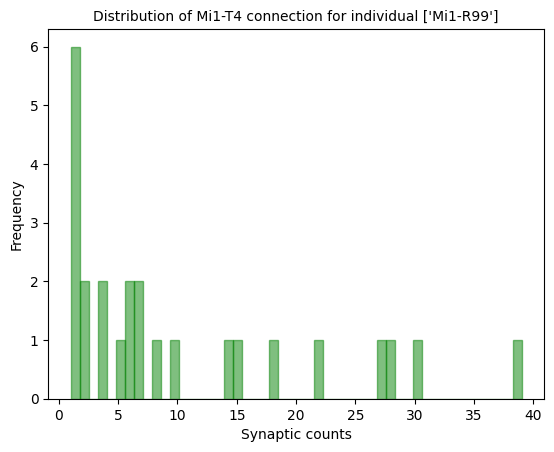

In [27]:
### Distribution of Mi1-T4 connection for individual Mi1 cells.
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
### Here select specific T4 cells
Mi1 = ['Mi1-R99']
db_Mi1_T4 = db_Mi1_T4.loc[db_Mi1_T4['optic_lobe_id'].isin(Mi1)]
# Frequency of the Distribution of the synaptic count of Mi1s-T4
# For one T4
db_Mi1_T4.hist(column = 'counts', grid=False, bins=50, edgecolor = 'green', color='green', alpha=0.5)
#plt.yscale('log')
plt.title(f'Distribution of Mi1-T4 connection for individual {Mi1}', size=10)
plt.xlabel('Synaptic counts', size=10)
plt.ylabel('Frequency', size=10) # here can i normalize the y axis to soemthing more meaningful? 
plt.savefig(f'Distribution of Mi1-T4 connection for individual {Mi1}.png')

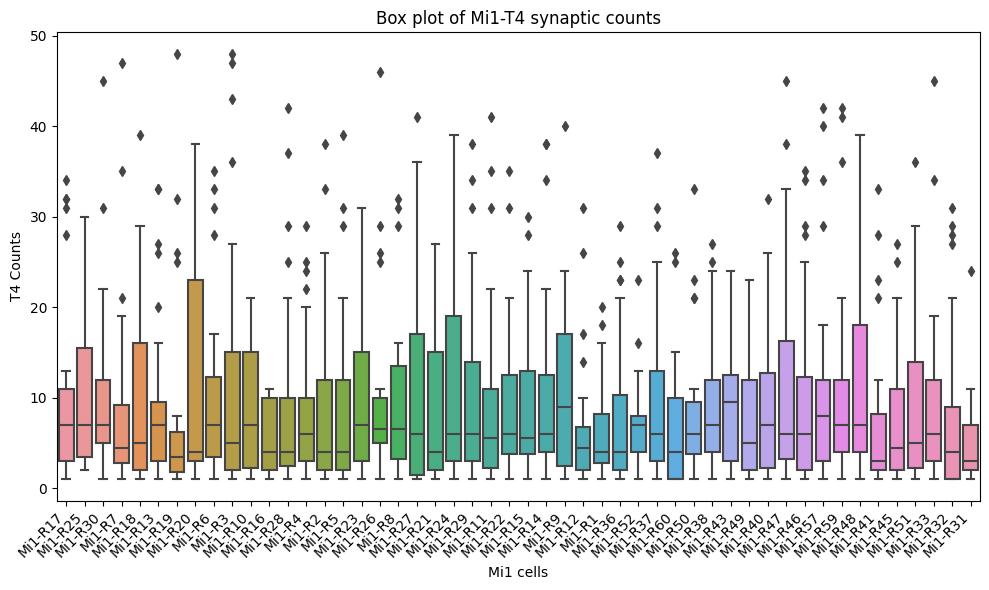

In [29]:
# For T4:
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db_Mi1_T4['optic_lobe_id'].unique()[:50]
selected_data = db_Mi1_T4[db_Mi1_T4['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mi1 cells')
plt.ylabel('T4 Counts')
plt.title('Box plot of Mi1-T4 synaptic counts')
plt.tight_layout()
plt.savefig('Box plot of Mi1-T4 synaptic counts.png')

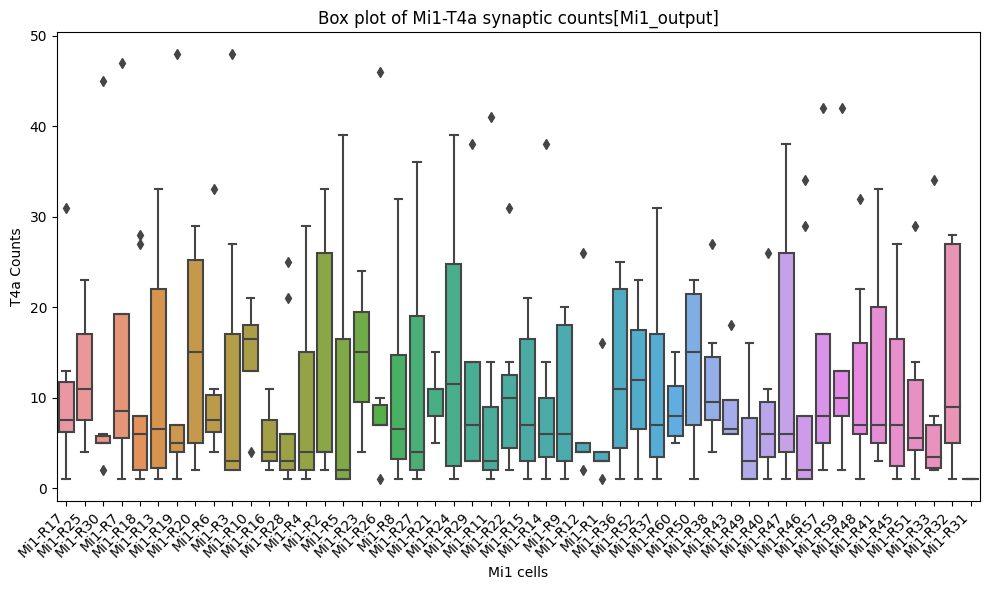

In [32]:
# For T4a:
symbols_to_select = ['T4a']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db_Mi1_T4['optic_lobe_id'].unique()[:50]
selected_data = db_Mi1_T4[db_Mi1_T4['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mi1 cells')
plt.ylabel('T4a Counts')
plt.title('Box plot of Mi1-T4a synaptic counts[Mi1_output]')
plt.tight_layout()
plt.savefig('Box plot of Mi1-T4a synaptic counts[Mi1_output].png')

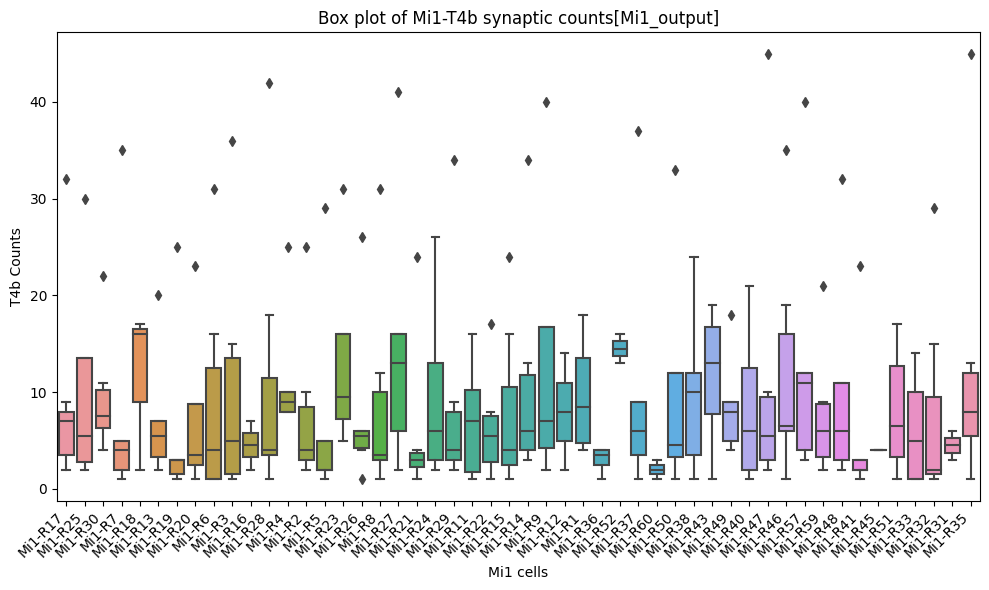

In [35]:
# For T4b:
symbols_to_select = ['T4b']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db_Mi1_T4['optic_lobe_id'].unique()[:50]
selected_data = db_Mi1_T4[db_Mi1_T4['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mi1 cells')
plt.ylabel('T4b Counts')
plt.title('Box plot of Mi1-T4b synaptic counts[Mi1_output]')
plt.tight_layout()
plt.savefig('Box plot of Mi1-T4b synaptic counts[Mi1_output].png')

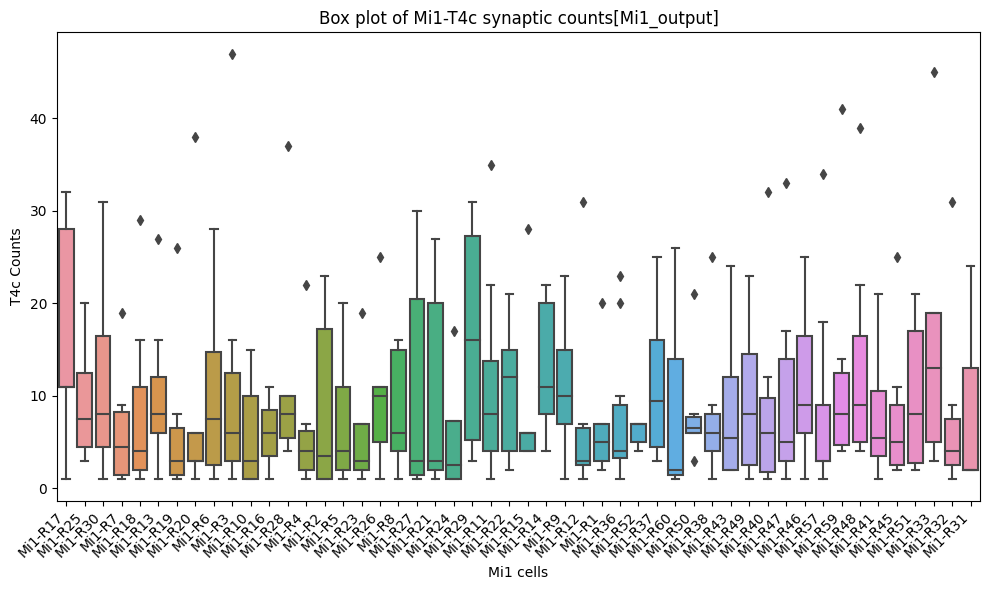

In [36]:
# For T4c:
symbols_to_select = ['T4c']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db_Mi1_T4['optic_lobe_id'].unique()[:50]
selected_data = db_Mi1_T4[db_Mi1_T4['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mi1 cells')
plt.ylabel('T4c Counts')
plt.title('Box plot of Mi1-T4c synaptic counts[Mi1_output]')
plt.tight_layout()
plt.savefig('Box plot of Mi1-T4c synaptic counts[Mi1_output].png')

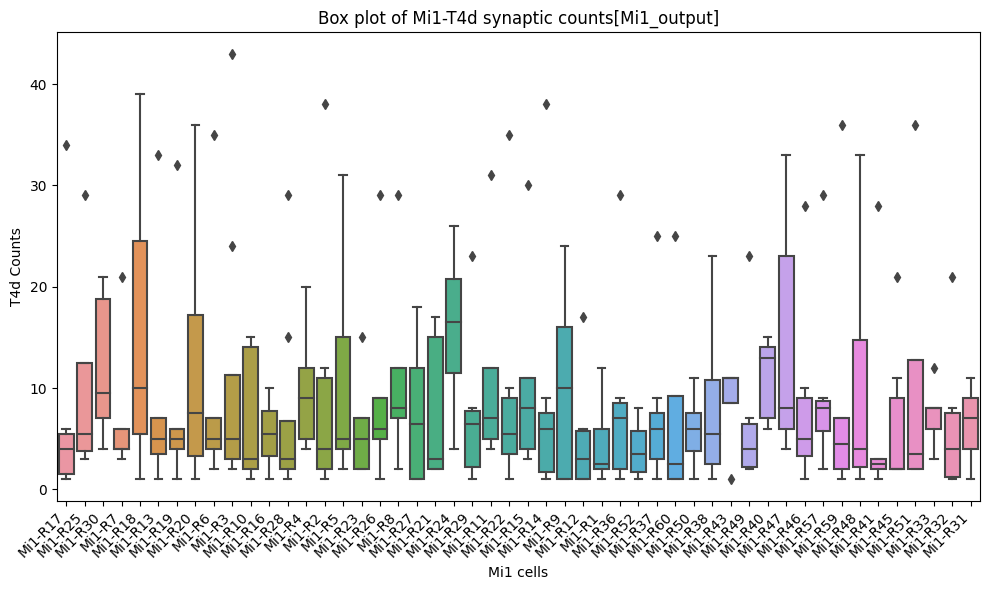

In [37]:
# For T4d:
symbols_to_select = ['T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
selected_optic_lobe_ids = db_Mi1_T4['optic_lobe_id'].unique()[:50]
selected_data = db_Mi1_T4[db_Mi1_T4['optic_lobe_id'].isin(selected_optic_lobe_ids)]
plt.figure(figsize=(10, 6))  
sns.boxplot(x='optic_lobe_id', y='counts', data=selected_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mi1 cells')
plt.ylabel('T4d Counts')
plt.title('Box plot of Mi1-T4d synaptic counts[Mi1_output]')
plt.tight_layout()
plt.savefig('Box plot of Mi1-T4d synaptic counts[Mi1_output].png')

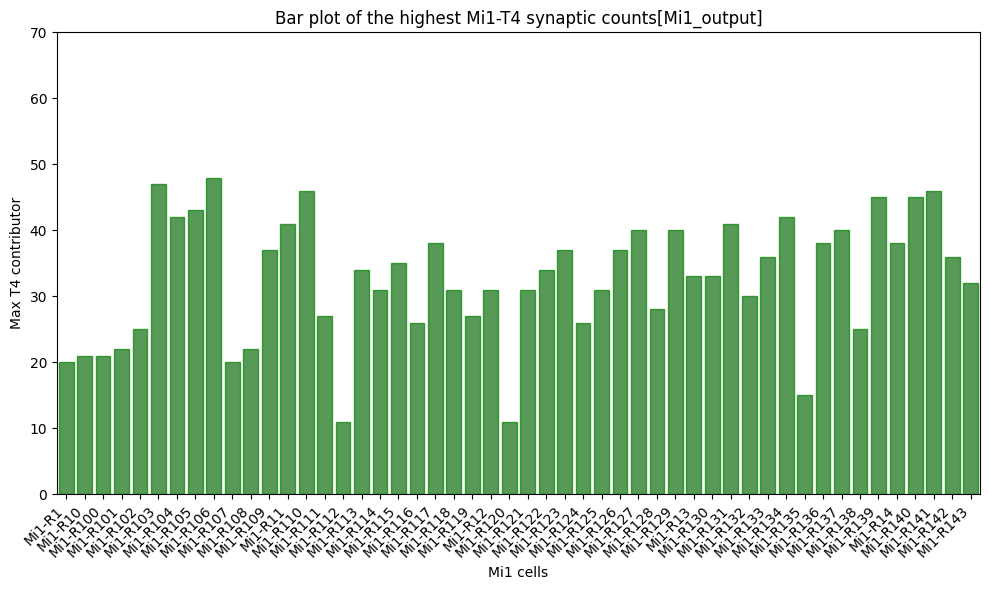

In [43]:
### Bar plots of top count T4 cell to Mi1 cells.
### Same plot as above but for all individual T4 cells.
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

### filter through the highest Mi1 contibutor for each T4 cell
db_Mi1_T4 = db_Mi1_T4.loc[db_Mi1_T4.groupby('optic_lobe_id')['counts'].idxmax()]

selected_optic_lobe_ids = db_Mi1_T4['optic_lobe_id'].unique()[:50]
selected_data = db_Mi1_T4[db_Mi1_T4['optic_lobe_id'].isin(selected_optic_lobe_ids)]
### Make the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='optic_lobe_id', y='counts', errorbar=None,edgecolor = 'green', color = 'green',alpha=0.7)
plt.xlabel('Mi1 cells')
plt.ylabel('Max T4 contributor')
plt.ylim(0, db_Mi1_T4['counts'].max()) # get the maximum value of the entire dataset
plt.title('Bar plot of the highest Mi1-T4 synaptic counts[Mi1_output]')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Bar Plot of the highest Mi1-T4 connections[Mi1_output].png')

optic_lobe_id
Mi1-R1      5
Mi1-R10     4
Mi1-R100    5
Mi1-R101    5
Mi1-R102    5
           ..
Mi1-R95     1
Mi1-R96     6
Mi1-R97     3
Mi1-R98     6
Mi1-R99     6
Length: 792, dtype: int64


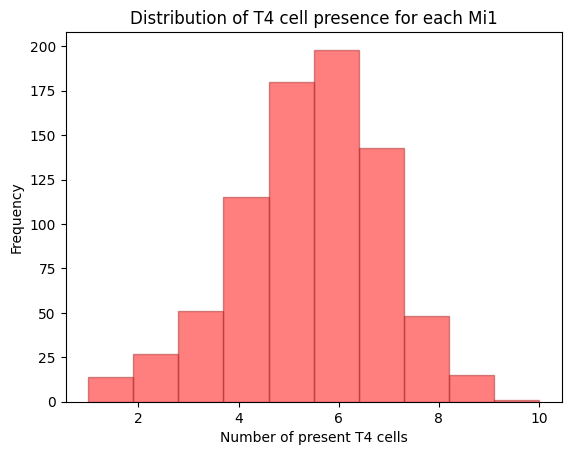

In [78]:
##### Plot how many T4 cells are per Mi1 in a histogram
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
### Calculate the mean, median and STD  of the synaptic strength of Mi1-T4 cells
T4_occurrence = db_Mi1_T4[db_Mi1_T4['symbol'] == 'T4a'].groupby('optic_lobe_id').size()
print(T4_occurrence)
T4_occurrence.hist(grid=False, bins=10, edgecolor = 'brown', color='red', alpha=0.5)

plt.xlabel('Number of present T4 cells')
plt.ylabel('Frequency')
plt.title('Distribution of T4 cell presence for each Mi1')
plt.savefig('Distribution of T4 cell presence for each Mi1.png')

optic_lobe_id
Mi1-R1      20
Mi1-R10     14
Mi1-R100    17
Mi1-R101    25
Mi1-R102    19
            ..
Mi1-R95      5
Mi1-R96     28
Mi1-R97      8
Mi1-R98     26
Mi1-R99     25
Length: 796, dtype: int64


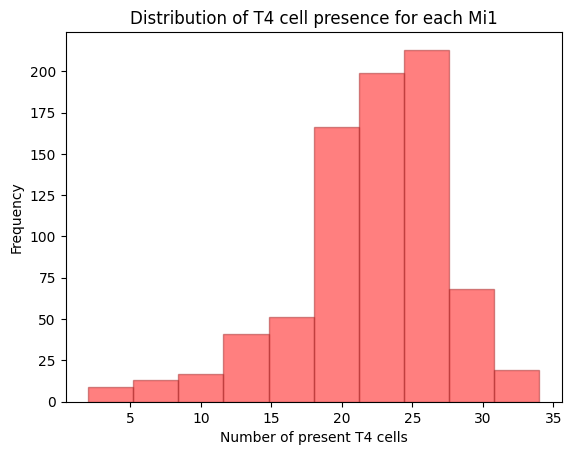

In [84]:
##### Plot how many T4 cells are per Mi1 in a histogram
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
### Calculate the mean, median and STD  of the synaptic strength of Mi1-T4 cells
T4_occurrence = db_Mi1_T4.groupby('optic_lobe_id').size()
print(T4_occurrence)
T4_occurrence.hist(grid=False, bins=10, edgecolor = 'brown', color='red', alpha=0.5)

plt.xlabel('Number of present T4 cells')
plt.ylabel('Frequency')
plt.title('Distribution of T4 cell presence for each Mi1')
plt.savefig('Distribution of T4 cell presence for each Mi1.png')

In [46]:
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

In [47]:
db_Mi1_T4

,Unnamed: 0,guess,author,postsynaptic_ID,counts,presynaptic_ID,postynaptic_ID,symbol,optic_lobe_id,dorso-ventral
5,5,T4d; FBbt_00003735,392,720575940610876258,34,720575940625276958,720575940610876258,T4d,Mi1-R17,NaN
6,6,T4c; FBbt_00003734,392,720575940619979313,32,720575940625276958,720575940619979313,T4c,Mi1-R17,NaN
7,7,T4b; FBbt_00003733,392,720575940618508381,32,720575940625276958,720575940618508381,T4b,Mi1-R17,NaN
8,8,T4a; FBbt_00003732,392,720575940622126847,31,720575940625276958,720575940622126847,T4a,Mi1-R17,NaN
12,12,T4c; FBbt_00003734,392,720575940637627749,28,720575940625276958,720575940637627749,T4c,Mi1-R17,NaN
...,...,...,...,...,...,...,...,...,...,...
427839,427839,T4b; FBbt_00003733,392,720575940613292798,5,720575940625577912,720575940613292798,T4b,Mi1-R782,NaN
427846,427846,T4c; FBbt_00003734,392,720575940621086299,4,720575940625577912,720575940621086299,T4c,Mi1-R782,NaN
427848,427848,T4d; FBbt_00003735,392,720575940634542191,4,720575940625577912,720575940634542191,T4d,Mi1-R782,NaN
427872,427872,T4a; FBbt_00003732,392,720575940621353392,3,720575940625577912,720575940621353392,T4a,Mi1-R782,NaN


optic_lobe_id
Mi1-R1      5
Mi1-R10     4
Mi1-R100    5
Mi1-R101    5
Mi1-R102    5
           ..
Mi1-R95     1
Mi1-R96     6
Mi1-R97     3
Mi1-R98     6
Mi1-R99     6
Length: 792, dtype: int64


<AxesSubplot: >

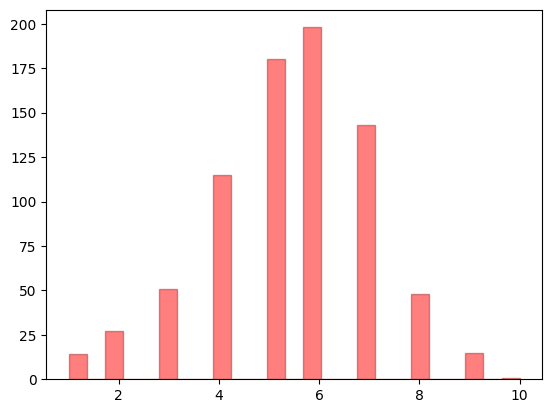